In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd


import os
import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dropout,Conv2D,MaxPooling2D,Dense,GlobalAveragePooling2D

## Visualizing Sound From Every Class

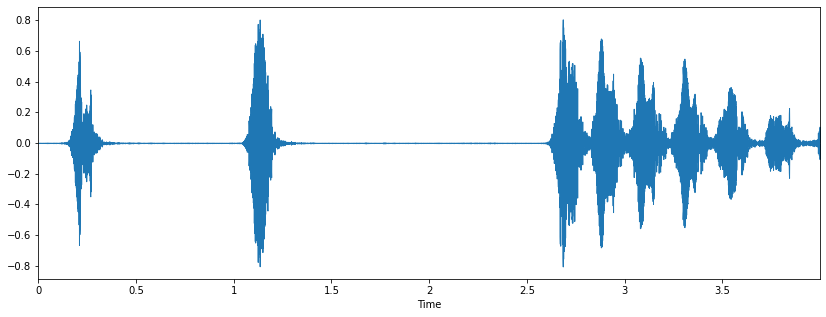

In [49]:
filename = '/content/fold1/101415-3-0-2.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

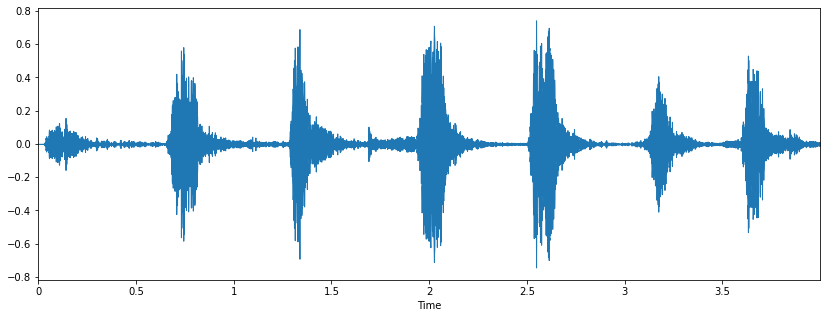

In [50]:
filename = '/content/fold2/100652-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

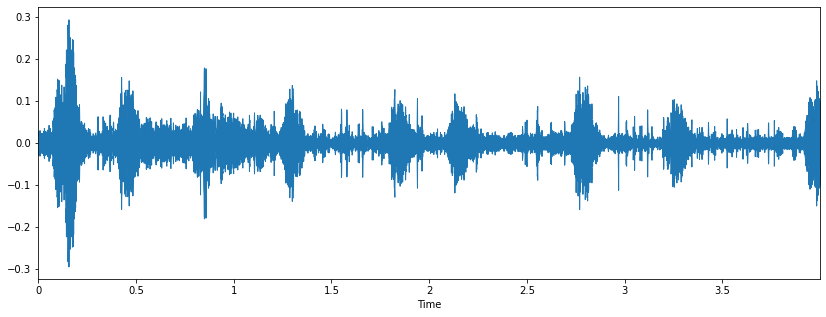

In [51]:
filename = '/content/fold3/102105-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

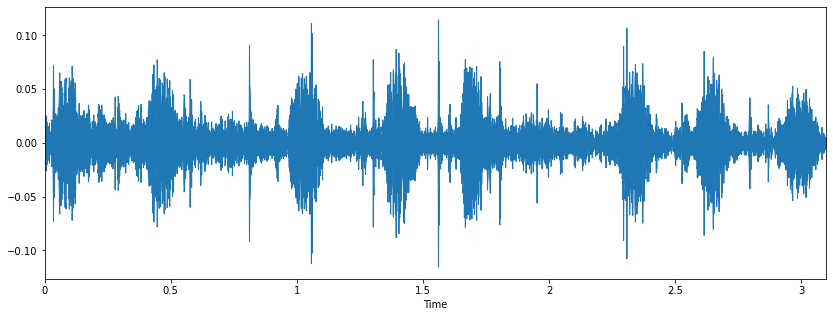

In [52]:
filename = '/content/fold4/102102-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

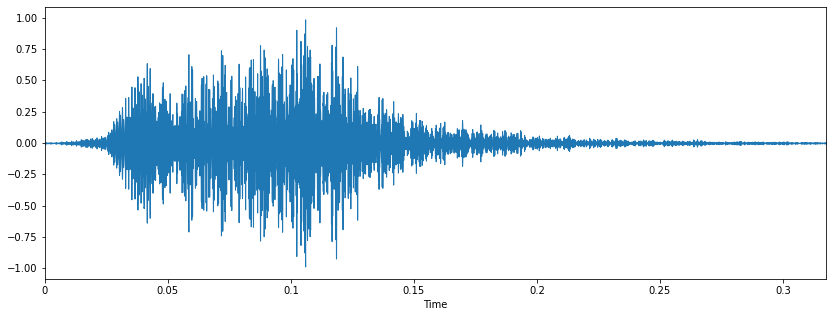

In [53]:
filename = '/content/fold5/100032-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

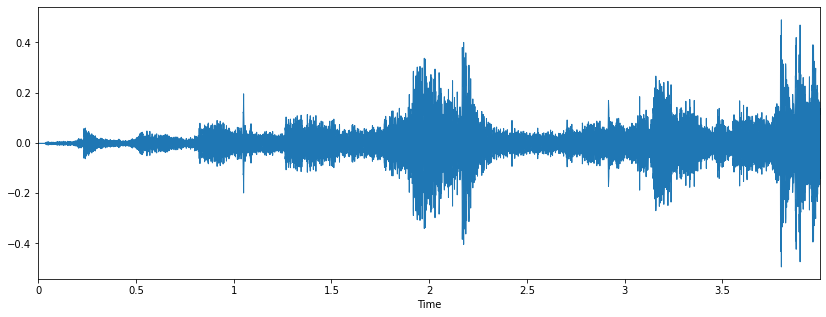

In [54]:
filename = '/content/fold6/101281-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

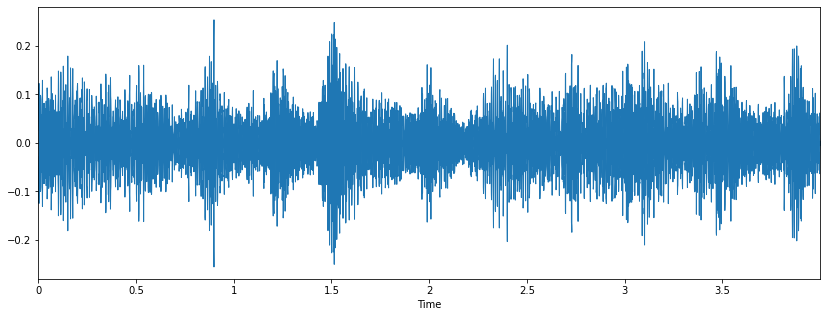

In [55]:
filename = '/content/fold7/101848-9-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

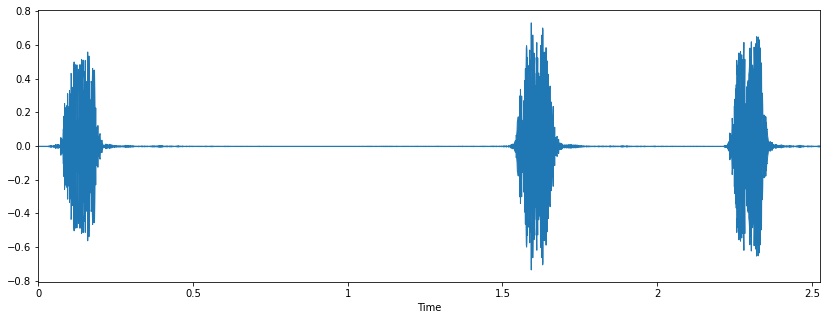

In [56]:
filename = '/content/fold8/103076-3-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

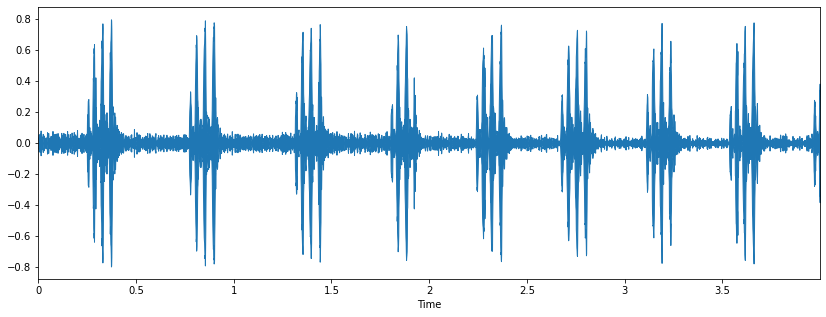

In [57]:
filename = '/content/fold9/101729-0-0-1.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

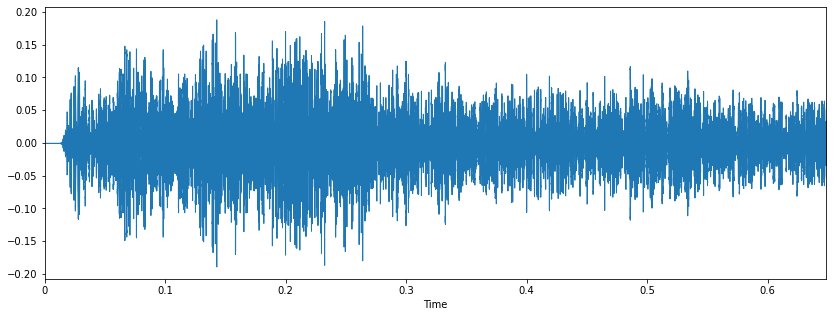

In [58]:
filename = '/content/fold10/100648-1-0-0.wav'

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

## UrbanSound metadata(csv file)

In [0]:
metadata = pd.read_csv('/content/UrbanSound8K.csv')

In [60]:
metadata.head()

slice_file_name    fsID  start  ...  fold  classID             class
0    100032-3-0-0.wav  100032    0.0  ...     5        3          dog_bark
1  100263-2-0-117.wav  100263   58.5  ...     5        2  children_playing
2  100263-2-0-121.wav  100263   60.5  ...     5        2  children_playing
3  100263-2-0-126.wav  100263   63.0  ...     5        2  children_playing
4  100263-2-0-137.wav  100263   68.5  ...     5        2  children_playing

[5 rows x 8 columns]

## #Feature Engineering

In [61]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [62]:
metadata['class'].value_counts()

drilling            1000
jackhammer          1000
engine_idling       1000
dog_bark            1000
street_music        1000
air_conditioner     1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

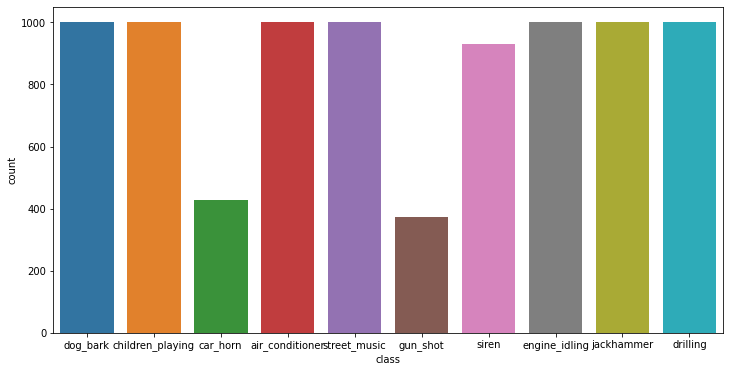

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(metadata['class'])

Those are balanced data


In [0]:
max_pad_len = 174
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [65]:
full_path = '/content/'

features = []

for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(full_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["classID"]
    data = extract_features(file_name)
    
    features.append([data, class_label])
             
        
feature_df = pd.DataFrame(features, columns=['feature','class'])
print('total number of features :',len(feature_df)) 

total number of features : 8732


In [66]:
feature_df.head()

feature  class
0  [[-306.772569323401, -177.59208535704371, -99....      3
1  [[-457.69536206989505, -451.0248088536722, -45...      2
2  [[-468.03671021239467, -467.4226560550245, -48...      2
3  [[-422.4221469201535, -411.9085176553704, -409...      2
4  [[-438.1016202414386, -434.47786480748454, -44...      2

In [67]:
feature_df.shape

(8732, 2)

## Feature and Label Data

In [0]:
X = np.array(feature_df['feature'].tolist())
y = np.array(feature_df['class'].tolist())

## Reshaping of Feature data

In [0]:
X = X.reshape(X.shape[0], 40, 174, 1)

## Normalization of Label Data

In [0]:
le = LabelEncoder()
y_one_hot = to_categorical(le.fit_transform(y))

## Dividing Dataset

In [0]:
#spliting the dataset for train and test
x_train, x_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state = 42)

In [72]:
#spliting x_train and y_train for validation data
Xtrain,xvalid, Ytrain,yvalid = train_test_split(x_train,y_train, test_size=.2, random_state=0)
print('Shape of Xtrain :',Xtrain.shape)
print('Shape of xvalid :',xvalid.shape)
print('Shape of Ytrain :',Ytrain.shape)
print('Shape of yvalid :',yvalid.shape)

Shape of Xtrain : (5588, 40, 174, 1)
Shape of xvalid : (1397, 40, 174, 1)
Shape of Ytrain : (5588, 10)
Shape of yvalid : (1397, 10)


## Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(40, 174, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax'))

In [76]:
#summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 41, 64)        

In [0]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

Training Accuracy:  0.1106657087802887


In [79]:
#training the model
model_history = model.fit(Xtrain, Ytrain, batch_size=256, epochs=50, verbose=1,
          validation_data=(x_test, y_test))

Train on 5588 samples, validate on 1747 samples
Epoch 1/50
5588/5588 [==============================] - 1s 143us/step - loss: 5.5709 - accuracy: 0.1523 - val_loss: 2.1717 - val_accuracy: 0.2061
Epoch 2/50
5588/5588 [==============================] - 1s 106us/step - loss: 2.0896 - accuracy: 0.2593 - val_loss: 2.0588 - val_accuracy: 0.2770
Epoch 3/50
5588/5588 [==============================] - 1s 106us/step - loss: 1.8441 - accuracy: 0.3350 - val_loss: 1.9321 - val_accuracy: 0.3303
Epoch 4/50
5588/5588 [==============================] - 1s 105us/step - loss: 1.6856 - accuracy: 0.4114 - val_loss: 1.7691 - val_accuracy: 0.3904
Epoch 5/50
5588/5588 [==============================] - 1s 105us/step - loss: 1.5323 - accuracy: 0.4644 - val_loss: 1.6284 - val_accuracy: 0.4396
Epoch 6/50
5588/5588 [==============================] - 1s 105us/step - loss: 1.4216 - accuracy: 0.4984 - val_loss: 1.5491 - val_accuracy: 0.4631
Epoch 7/50
5588/5588 [==============================] - 1s 107us/step - loss

In [80]:
#evaluating with test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.8202633261680603


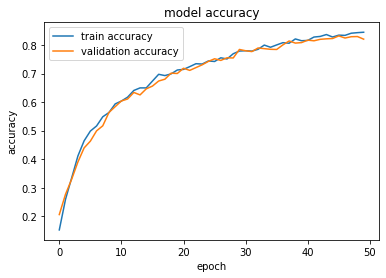

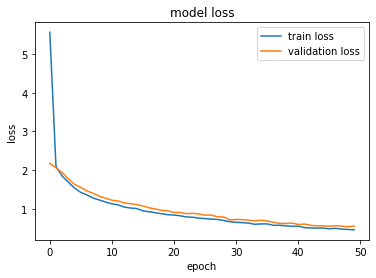

In [81]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='best')
plt.show()

In [0]:
#predicting with test data
predicted = model.predict(x_test)

In [0]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, 40, 174, 1)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_vector[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [87]:
# Class: Air Conditioner

filename = '/content/fold5/100263-2-0-143.wav' 
print_prediction(filename)

The predicted class is: 2 

0 		 :  0.00182719610165804624557495117188
1 		 :  0.00769953941926360130310058593750
2 		 :  0.83999824523925781250000000000000
3 		 :  0.01334158144891262054443359375000
4 		 :  0.00012174286530353128910064697266
5 		 :  0.02479366399347782135009765625000
6 		 :  0.00000014921390345534746302291751
7 		 :  0.00001446897113055456429719924927
8 		 :  0.01496582012623548507690429687500
9 		 :  0.09723763912916183471679687500000


In [88]:
# Class: Air Conditioner

filename = '/content/fold5/100852-0-0-29.wav' 
print_prediction(filename)


The predicted class is: 0 

0 		 :  0.91180592775344848632812500000000
1 		 :  0.00099005422089248895645141601562
2 		 :  0.00073071144288405776023864746094
3 		 :  0.00200439523905515670776367187500
4 		 :  0.02341227605938911437988281250000
5 		 :  0.00880866032093763351440429687500
6 		 :  0.00032360159093514084815979003906
7 		 :  0.01925384625792503356933593750000
8 		 :  0.00755052641034126281738281250000
9 		 :  0.02512002922594547271728515625000
